In [150]:
# pip install matplotlib

In [151]:
# pip install opencv-python

In [160]:
pip install tensorflow

  Using cached absl_py-2.2.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.1-py3-none-any.whl.metadata (6.1 kB)
     ---------------------------------------- 59.7/59.7 kB 1.5 MB/s eta 0:00:00
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 50.1/50.1 kB 2.5 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached typing_extensions-4.13.0-py3-none-any.whl.metadata (3.0 kB)
 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [164]:
pip install numpy==1.23


   ---------------------------------------- 14.7/14.7 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.0 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.23.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
# Data Standardization

In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def preprocess_image(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    """Apply CLAHE preprocessing with dynamic parameters."""
    height, width = image.shape[:2]

    if height > 640 or width > 640:
        upscale_image = cv2.resize(image, (1000, 1000), interpolation=cv2.INTER_LINEAR)
        processed_image = cv2.resize(upscale_image, (640, 640), interpolation=cv2.INTER_AREA)
    else:
        # Apply CLAHE with dynamic tileGridSize
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
        cl = clahe.apply(l)
        limg = cv2.merge((cl, a, b))
        clahe_image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
        processed_image = cv2.resize(clahe_image, (640, 640), interpolation=cv2.INTER_LINEAR)
    
    return processed_image

def show_and_save_processed_images(input_dir, output_dir="preprocessed_images", clip_limit=2.0, tile_grid_size=(8, 8)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        file_path = os.path.join(input_dir, filename)
        if os.path.isfile(file_path):
            image = cv2.imread(file_path)
            if image is None:
                print(f"Error loading image: {file_path}")
                continue

            processed_image = preprocess_image(image, clip_limit, tile_grid_size)

            # Convert BGR to RGB for Matplotlib display
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

            # Ensure the processed image is saved correctly
            output_path = os.path.join(output_dir, f"processed_{filename}")
            success = cv2.imwrite(output_path, processed_image)
            if success:
                print(f"Saved processed image: {output_path}")
            else:
                print(f"Failed to save processed image: {output_path}")

            # Display images with labels
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))

            for ax in axes:
                ax.set_anchor("C")  # Center image in each axis
                ax.set_xticks([])    # Remove X ticks
                ax.set_yticks([])    # Remove Y ticks
                ax.set_frame_on(False)  # Hide borders

            axes[0].imshow(image_rgb)
            axes[0].set_title("Original Image", fontsize=12, fontweight="bold", color="red")

            axes[1].imshow(processed_image_rgb)
            axes[1].set_title(f"Processed Image\nCLAHE: ClipLimit: {clip_limit}, TileGridSize: {tile_grid_size}", fontsize=12, fontweight="bold", color="green")

            plt.subplots_adjust(wspace=0.5)  # Reduce space between images
            plt.show()


Saved processed image: preprocessed_images\processed_-20-_jpg.rf.0ac416a6c65f4cfd0ca5dc50fe7af312.jpg


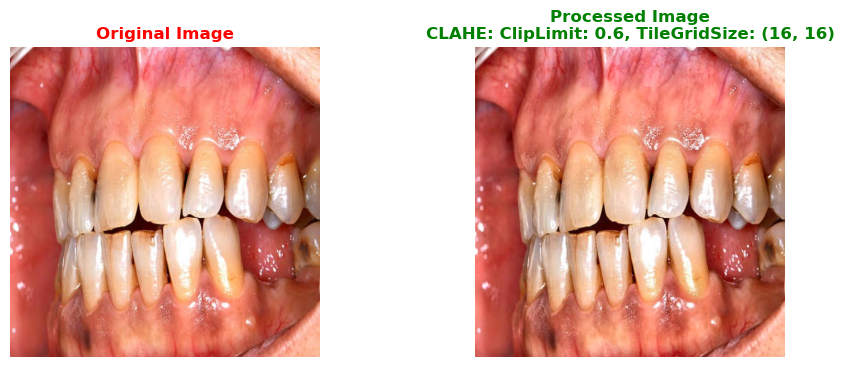

Saved processed image: preprocessed_images\processed_-35-_jpg.rf.9972f8335cac579cd7f187110c851c18.jpg


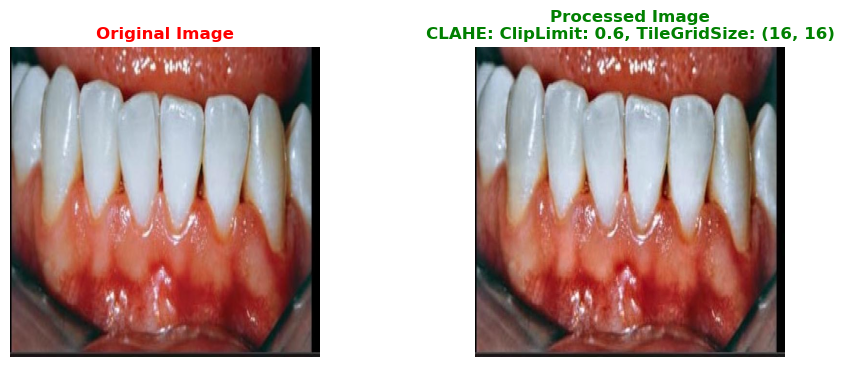

Saved processed image: preprocessed_images\processed_-41-_jpg.rf.768aaaa53470e100f15563bc14214d38.jpg


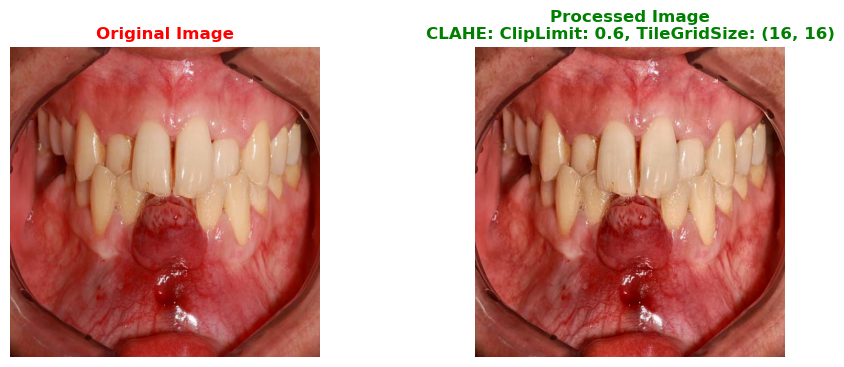

Saved processed image: preprocessed_images\processed_-47-_jpg.rf.c9b3f4eb33611aa93fb186cb874f4f69.jpg


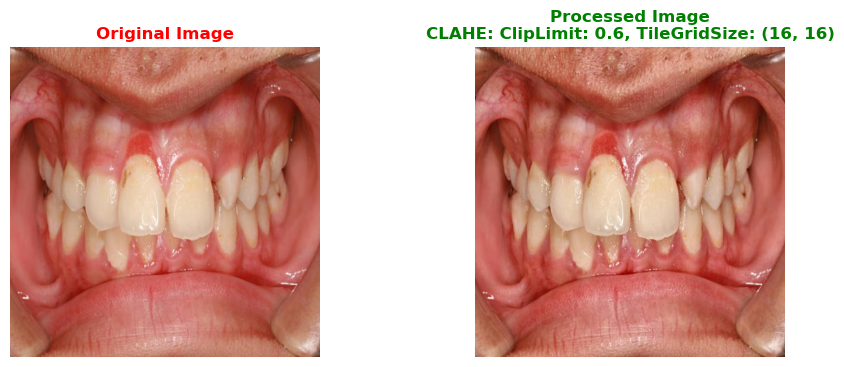

In [8]:
show_and_save_processed_images("training_data", output_dir="preprocessed_images", clip_limit=0.6, tile_grid_size=(16, 16))

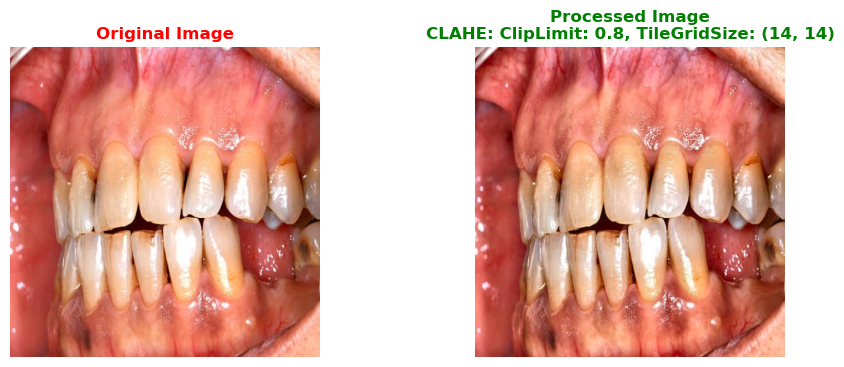

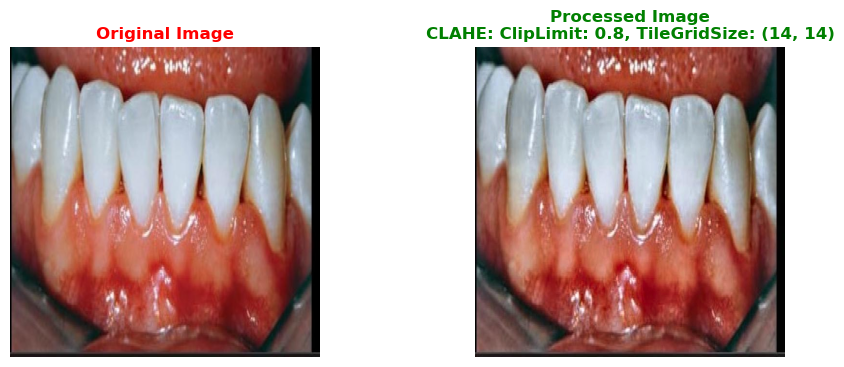

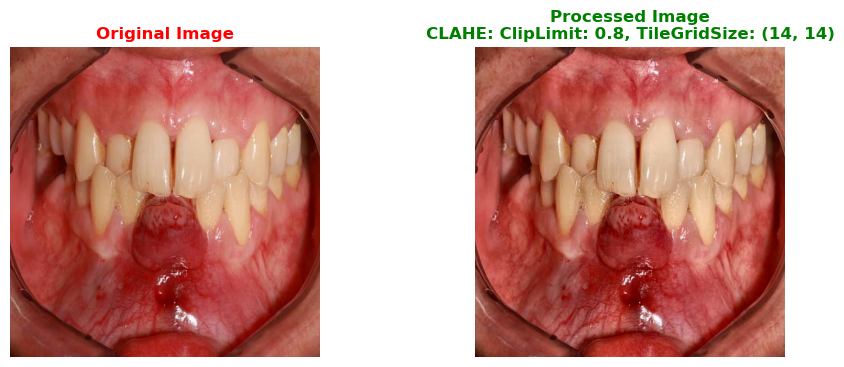

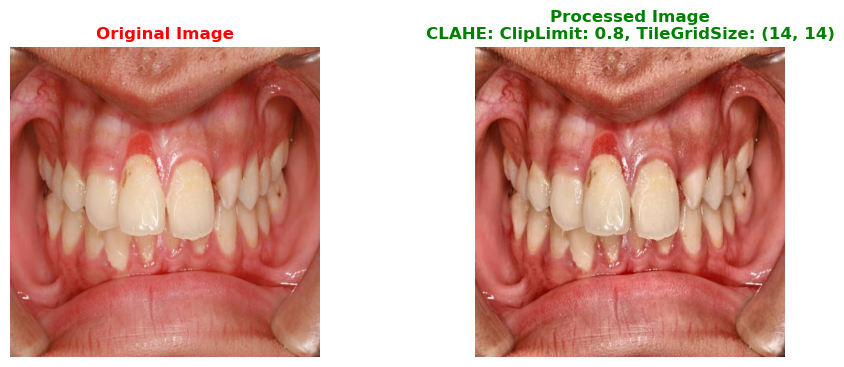

In [155]:
show_processed_images("training_data", clip_limit=0.8, tile_grid_size=(14, 14))

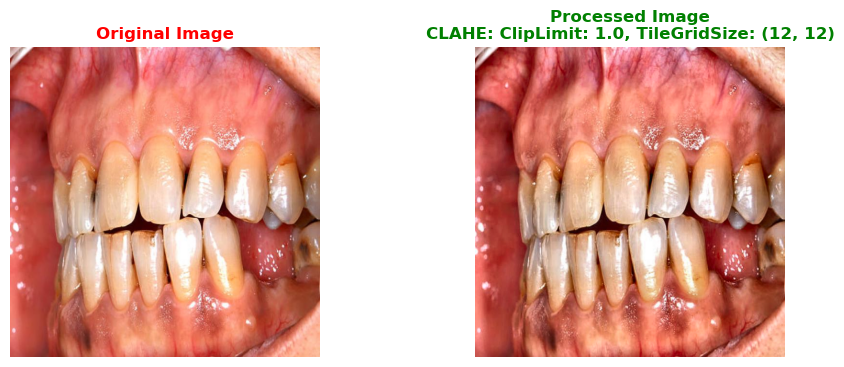

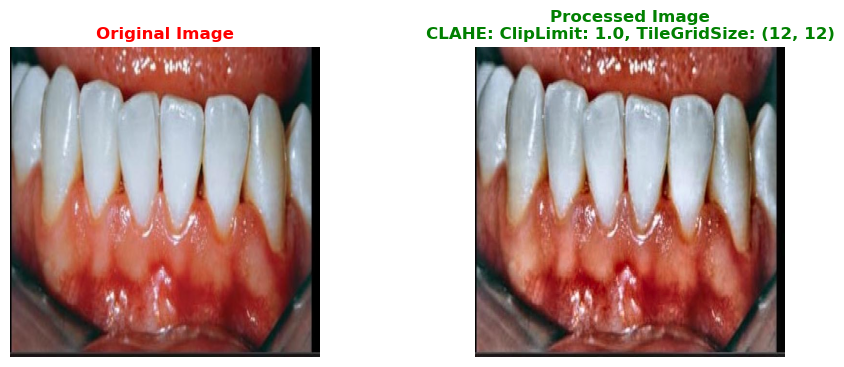

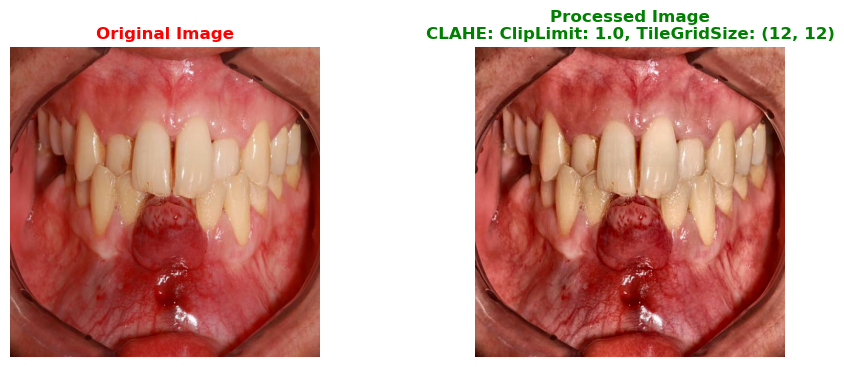

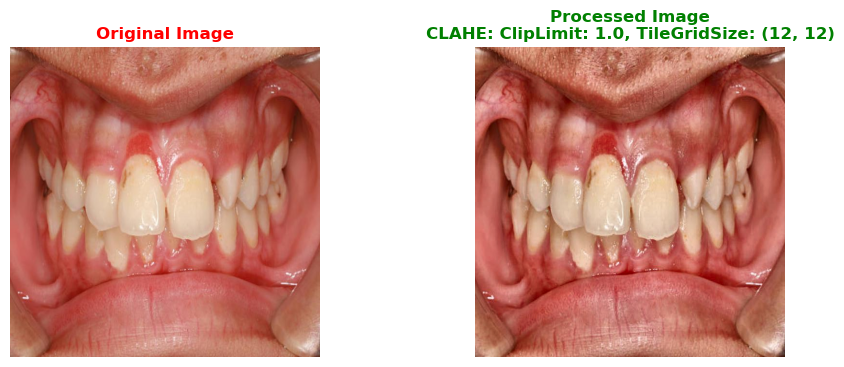

In [156]:
show_processed_images("training_data", clip_limit=1.0, tile_grid_size=(12, 12))

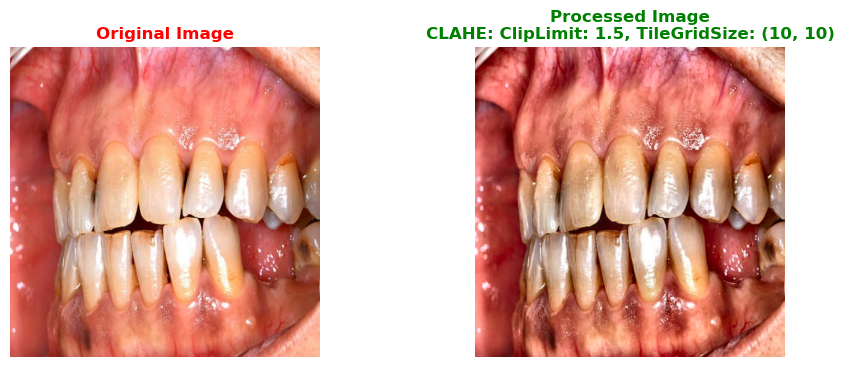

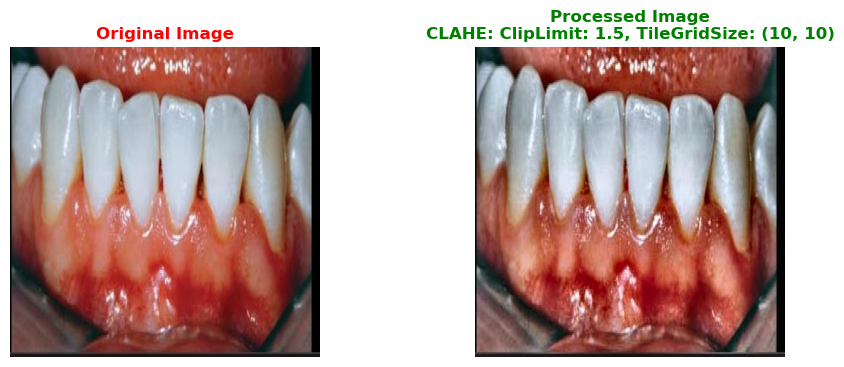

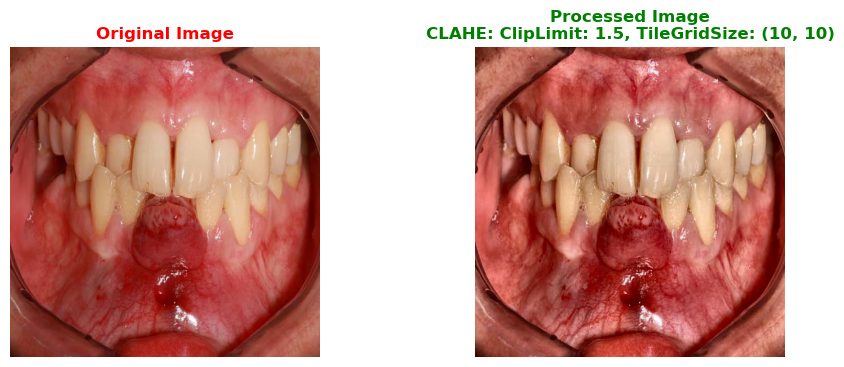

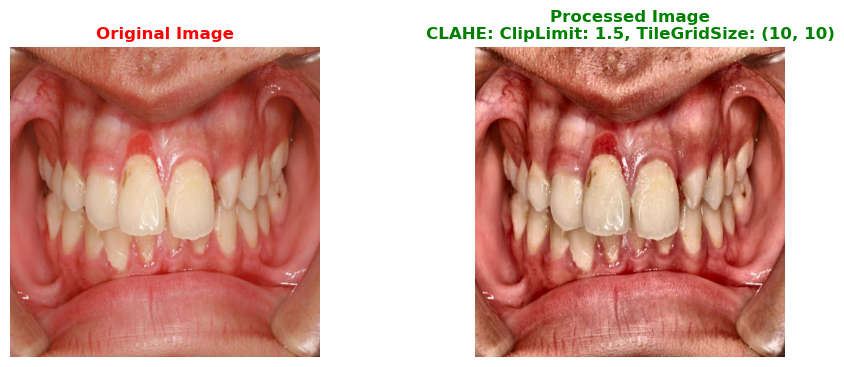

In [157]:
show_processed_images("training_data", clip_limit=1.5, tile_grid_size=(10, 10))

In [158]:
# Data Augmentation

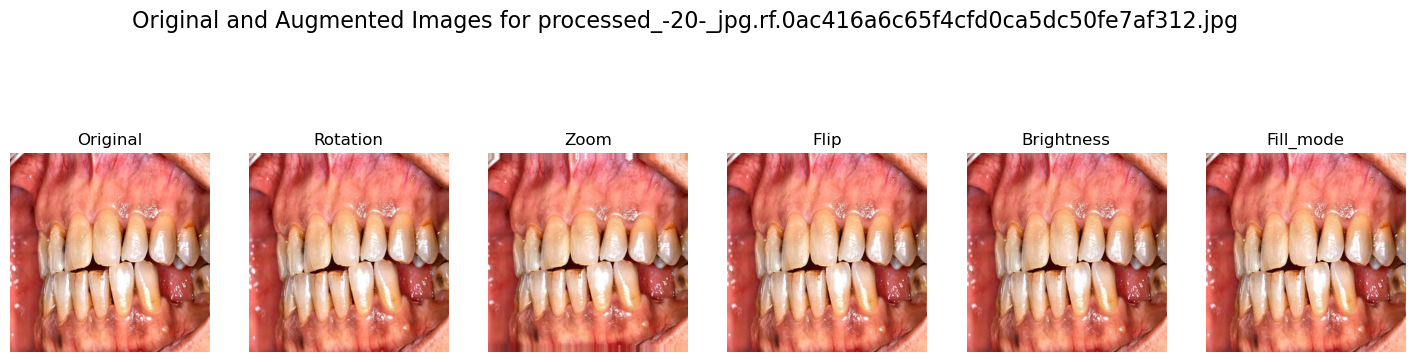

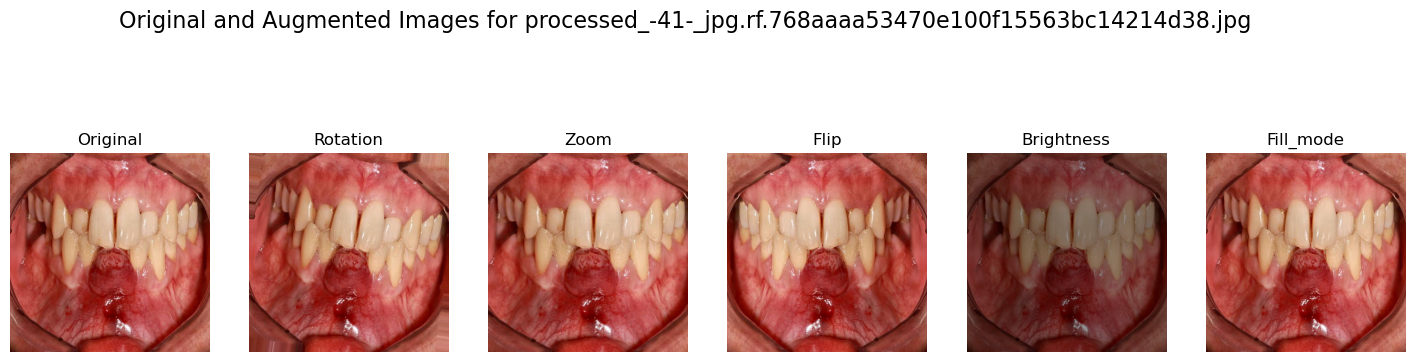

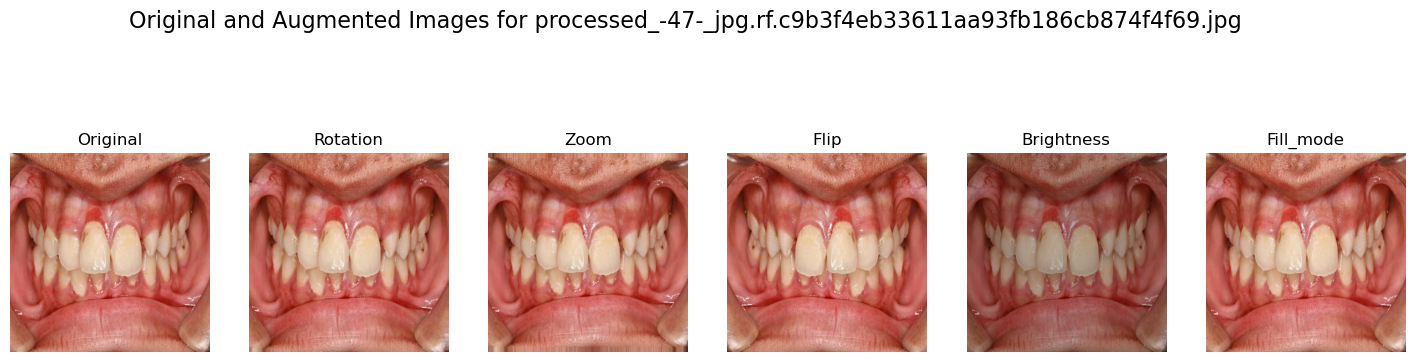

In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt

# Define input and output directories
input_dir = "preprocessed_images"
output_dir = "augmented_images"
os.makedirs(output_dir, exist_ok=True)

# Define separate augmentation generators
augmentation_configs = {
    "rotation": ImageDataGenerator(rotation_range=10-20),
    "zoom": ImageDataGenerator(zoom_range=0.1),
    "flip": ImageDataGenerator(horizontal_flip=True),
    "brightness": ImageDataGenerator(brightness_range=[0.5, 1.5]),
    "fill_mode": ImageDataGenerator(fill_mode='reflect')
}

# Loop through each image in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for valid image files
        img_path = os.path.join(input_dir, filename)
        img = load_img(img_path)  # Load the image
        img_array = img_to_array(img)  # Convert to array
        img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for the generator

        fig, axes = plt.subplots(1, 6, figsize=(18, 5))  # Create a subplot for 1 original + 5 augmented images
        fig.suptitle(f"Original and Augmented Images for {filename}", fontsize=16)

        # Display the original image
        axes[0].imshow(img)
        axes[0].set_title("Original")
        axes[0].axis('off')

        # Apply each augmentation separately
        for i, (aug_name, datagen) in enumerate(augmentation_configs.items()):
            batch = next(datagen.flow(img_array, batch_size=1))  # Generate one augmented image
            augmented_img = batch[0].astype('uint8')

            # Save augmented image
#             aug_filename = f"{filename.split('.')[0]}_{aug_name}.jpeg"
#             aug_path = os.path.join(output_dir, aug_filename)
#             tf.keras.preprocessing.image.save_img(aug_path, augmented_img)

            # Display the augmented image
            axes[i + 1].imshow(augmented_img)
            axes[i + 1].set_title(aug_name.capitalize())
            axes[i + 1].axis('off')

        plt.show()  # Show the original and augmented images

# print("Data augmentation completed. Augmented images are saved in the 'augmented_images' folder.")
